In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [3]:
dataset = pd.read_csv('house_price.csv')
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


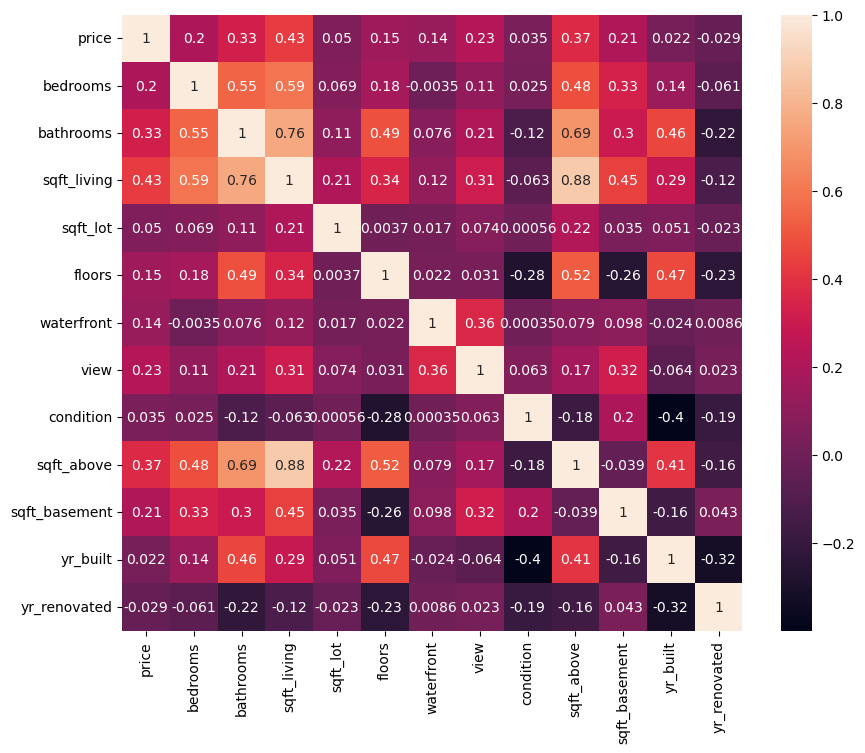

In [4]:
# sns.heatmap(data = dataset.corr(), annot=True)
# plt.show()

# Only select numeric columns
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
# Generate correlation heatmap
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()


In [5]:

# Step 1: Clean the 'date' column in the original dataset
dataset['date'] = pd.to_datetime(dataset['date'], errors='coerce')
dataset['date'] = dataset['date'].map(pd.Timestamp.toordinal)

# Step 2: Drop non-numeric columns before scaling
x = dataset.drop(['street', 'city', 'statezip', 'country'], axis=1, errors='ignore')
x_numeric = x.select_dtypes(include=['float64', 'int64'])

# Step 3: Scale the numeric data
sc = StandardScaler()
x_scaled = sc.fit_transform(x_numeric)



In [ ]:
x_numeric.dtypes
x_numeric.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,735355,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,735355,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,735355,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,735355,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,735355,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [7]:
x = dataset.iloc[:, :-1]
y = dataset["price"]

In [8]:

# Create an instance of the scaler
sc = StandardScaler()

# Fit the scaler ONLY on your numeric data
sc.fit(x_numeric)

# Now you can transform the numeric data
x_scaled = sc.transform(x_numeric)
x = pd.DataFrame(sc.transform(x_scaled) , columns=x_numeric.columns)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
x_numeric_train, x_numeric_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Linear Regresssion

In [10]:
lr = LinearRegression()
lr.fit(x_numeric_train, y_train)
lr.score(x_numeric_test, y_test) * 100

100.0

In [25]:
print(mean_squared_error(y_test, lr.predict(x_numeric_test)))
print(mean_absolute_error(y_test, lr.predict(x_numeric_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_numeric_test))))

6.797719663058036e-09
5.985115073955335e-05
8.244828477935752e-05


In [11]:
lr.coef_

array([ 1.45258560e-04,  3.17840461e+11, -2.28881836e-05,  3.05175781e-05,
        1.17751872e+01, -2.92838811e-02, -1.52587891e-05,  0.00000000e+00,
       -2.28881836e-05, -2.28881836e-05, -9.43384123e+00, -2.73422923e+00,
       -2.00271606e-05,  7.48597085e-05])

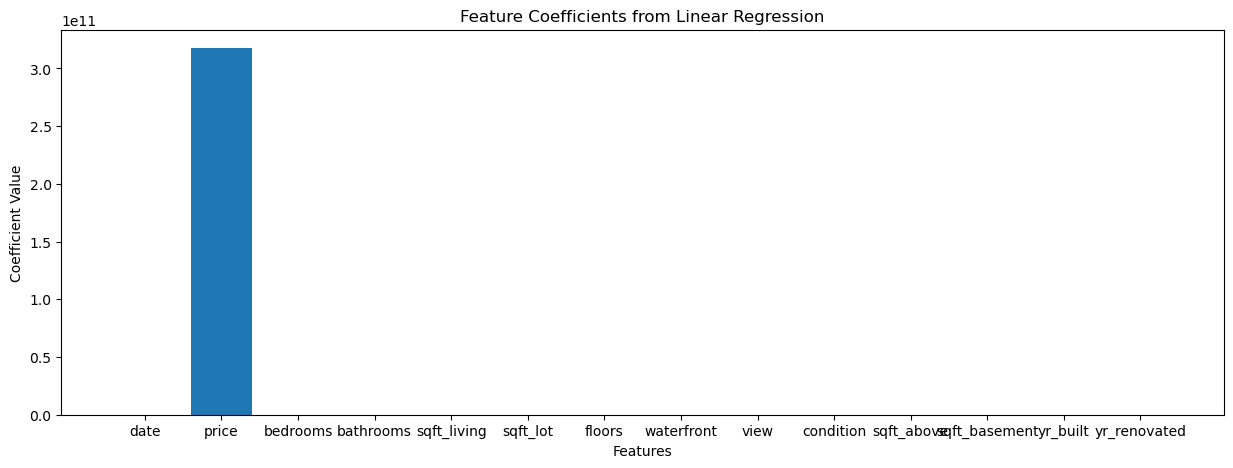

In [12]:
plt.figure(figsize=(15, 5))
plt.bar(x_numeric.columns, lr.coef_)
plt.title('Feature Coefficients from Linear Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

## Lasso

In [15]:
la = Lasso(alpha=0.1)
la.fit(x_numeric_train, y_train)
la.score(x_numeric_test, y_test) * 100

76.81930666552091

In [26]:
print(mean_squared_error(y_test, la.predict(x_numeric_test)))
print(mean_absolute_error(y_test, la.predict(x_numeric_test)))
print(np.sqrt(mean_squared_error(y_test, la.predict(x_numeric_test))))

236407452578.46564
103395.80789745414
486217.4951382001


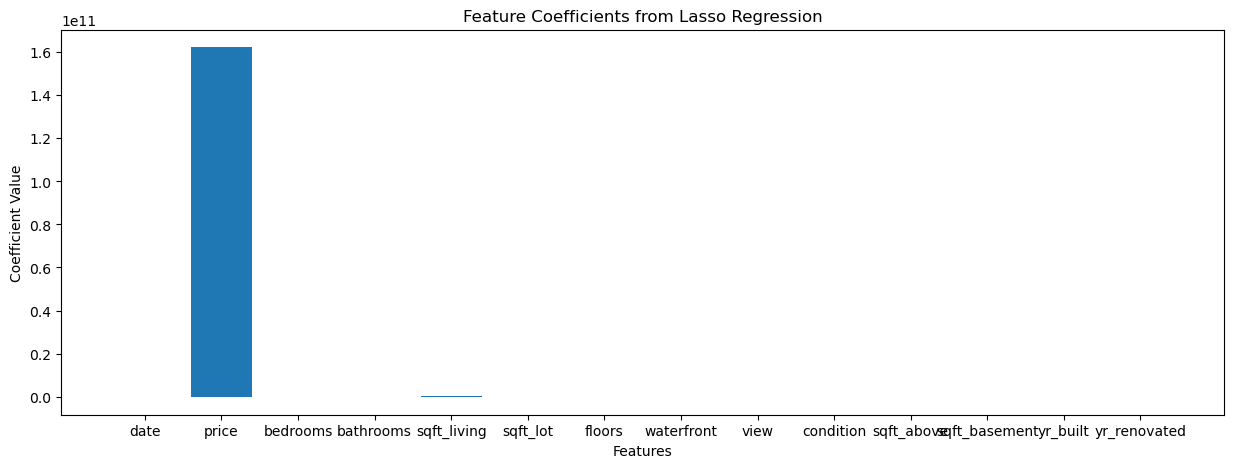

In [16]:
plt.figure(figsize=(15, 5))
plt.bar(x_numeric.columns, la.coef_)
plt.title('Feature Coefficients from Lasso Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

## Ridge

In [17]:
ri = Ridge(alpha=1.0)
ri.fit(x_numeric_train, y_train)
ri.score(x_numeric_test, y_test) * 100

3.0408778209941145

In [27]:
print(mean_squared_error(y_test, ri.predict(x_numeric_test)))
print(mean_absolute_error(y_test, ri.predict(x_numeric_test)))
print(np.sqrt(mean_squared_error(y_test, ri.predict(x_numeric_test))))

988834058923.0302
233442.79398895742
994401.357060131


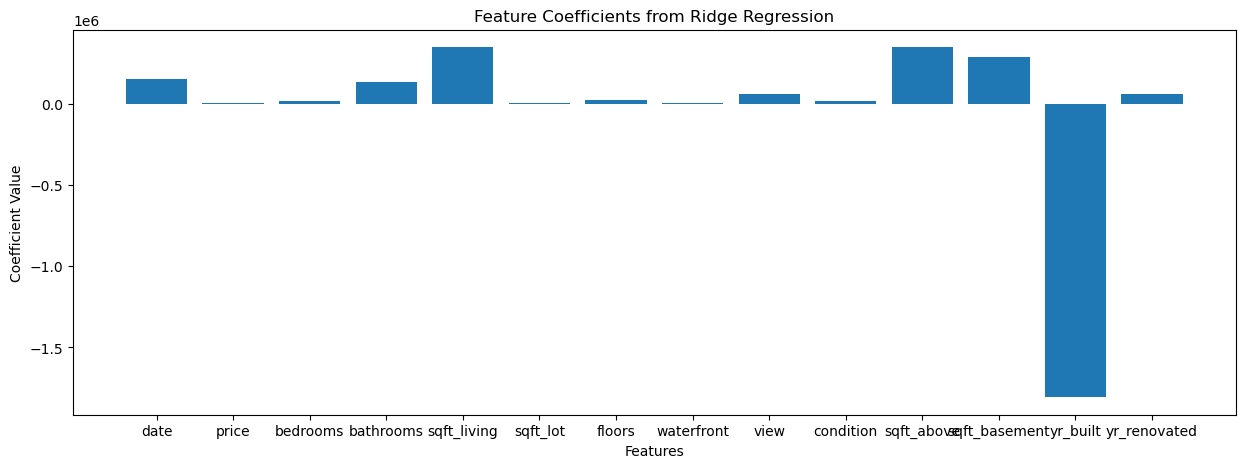

In [18]:
plt.figure(figsize=(15, 5))
plt.bar(x_numeric.columns, ri.coef_)
plt.title('Feature Coefficients from Ridge Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

In [29]:
df = pd.DataFrame({"col_name": x_numeric.columns,"LinearRegression":lr.coef_, "Lasso_Coefficient": la.coef_, "Ridge_Coefficient": ri.coef_})

df

,col_name,LinearRegression,Lasso_Coefficient,Ridge_Coefficient
0,date,1.452586e-04,1.112224e+04,1.504565e+05
1,price,3.178405e+11,1.623123e+11,1.045600e+03
2,bedrooms,-2.288818e-05,-2.580088e+04,1.442475e+04
3,bathrooms,3.051758e-05,1.126559e+04,1.348652e+05
4,sqft_living,1.177519e+01,1.243273e+08,3.451807e+05
5,sqft_lot,-2.928388e-02,-1.838752e+08,1.008748e+03
6,floors,-1.525879e-05,1.015483e+04,2.103314e+04
7,waterfront,0.000000e+00,1.334022e+03,3.314015e+03
8,view,-2.288818e-05,1.329712e+04,5.915801e+04
9,condition,-2.288818e-05,6.491600e+03,1.279933e+04
